# Assignment 07:- Clustering- Hierarchical (Airlines)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering 

In [2]:
data = pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [4]:
data.drop(['ID#'],axis=1,inplace=True)

In [5]:
data.rename(columns = {'Award?':'Award'}, inplace = True)

In [6]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [7]:
data.iloc[:,0:]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
from sklearn.preprocessing import MinMaxScaler
normalize=MinMaxScaler()
new_df=normalize.fit_transform(data.iloc[:,0:].to_numpy())
df_norm=pd.DataFrame(new_df,columns=data.columns[0:])
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


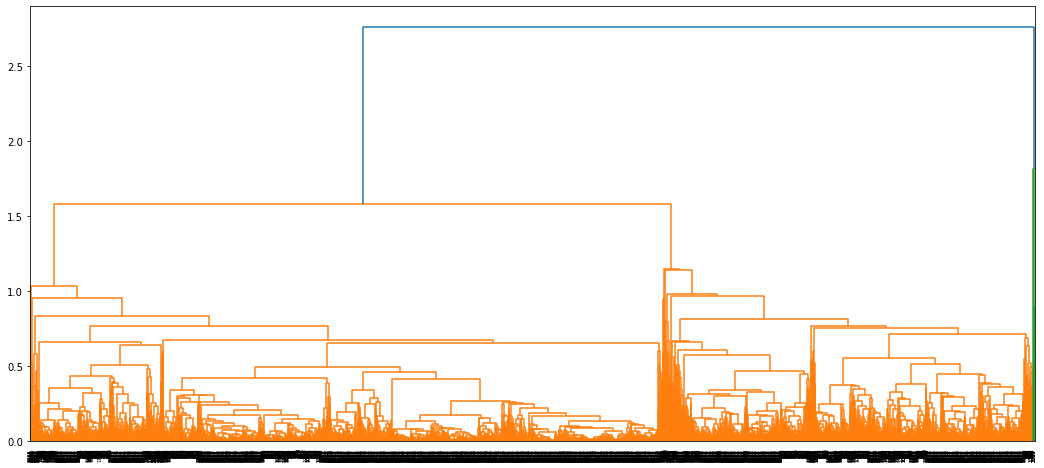

In [22]:
# Create Dendrograms

plt.figure(figsize=(18,8))
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

In [23]:
hc=AgglomerativeClustering(n_clusters=4,
                        affinity='euclidean',
                          linkage='average')

In [24]:
y_hc=hc.fit_predict(df_norm)
y_hc

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [25]:
clusters=pd.DataFrame(y_hc,columns=['Clusters'])
clusters

,Clusters
0,1
1,1
2,1
3,1
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [26]:
df_norm['h_clusterid']=clusters
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0,1
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0,1
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0,1
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0,1
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0,0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0,0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0,0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0,1


In [27]:
df_norm.sort_values("h_clusterid")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
1999,0.191881,0.130248,1.00,0.0,0.0,0.371644,0.290698,0.011357,0.056604,0.535086,1.0,0
1513,0.073189,0.152853,0.00,0.0,0.0,0.043855,0.093023,0.022715,0.037736,0.584157,1.0,0
1512,0.002803,0.000000,0.00,0.0,0.0,0.002275,0.023256,0.000000,0.000000,0.593682,1.0,0
3162,0.060535,0.000000,0.00,0.0,0.0,0.012136,0.046512,0.006490,0.037736,0.187364,1.0,0
3165,0.114272,0.000000,0.00,0.0,0.0,0.078965,0.290698,0.215693,0.226415,0.292018,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
275,1.000000,0.000000,0.00,0.0,0.0,0.064880,0.372093,0.156505,0.433962,0.877864,1.0,2
3594,0.016200,0.000000,0.75,0.0,0.0,0.317523,0.790698,0.455917,0.867925,0.159513,1.0,3
3235,0.168364,0.000000,0.00,0.0,0.0,0.099213,0.674419,0.417724,1.000000,0.273692,1.0,3
2015,0.031224,0.079656,0.75,0.0,0.0,0.306032,0.755814,0.717137,0.849057,0.461659,1.0,3


In [28]:
data['h_clusterid']=clusters
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [29]:
data.sort_values("h_clusterid")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
1999,327126,1452,5,1,1,97997,25,350,3,4440,1,0
1513,124775,1704,1,1,1,11564,8,700,2,4847,1,0
1512,4779,0,1,1,1,600,2,0,0,4926,1,0
3162,103203,0,1,1,1,3200,4,200,2,1556,1,0
3165,194816,0,1,1,1,20822,25,6647,12,2424,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
275,1704838,0,1,1,1,17108,32,4823,23,7283,1,2
3594,27619,0,4,1,1,83726,68,14050,46,1325,1,3
3235,287033,0,1,1,1,26161,58,12873,53,2272,1,3
2015,53232,888,4,1,1,80696,65,22100,45,3831,1,3


# K Means Clustering

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [18]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0


In [30]:
data.iloc[:,0:]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [31]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data_df=scaler.fit_transform(data.iloc[:,0:])
scaled_data_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01,  7.50737966e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01,  7.50737966e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01,  7.50737966e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -1.29575224e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  7.50737966e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  7.50737966e-01]])

In [32]:
kmeans=KMeans(n_clusters=3,random_state=0)
kmeans.fit(scaled_data_df)

KMeans(n_clusters=3, random_state=0)

In [33]:
kmeans.inertia_

33181.12391435341

In [34]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score

wcss=[]
sil_score=[]
cal_haz_score=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data_df)
    wcss.append(kmeans.inertia_)
    if i==1:
        continue
    sil_score.append(silhouette_score(scaled_data_df,kmeans.labels_))
    cal_haz_score.append(calinski_harabasz_score(scaled_data_df,kmeans.labels_))

In [35]:
wcss

[47988.0,
 37825.507191503566,
 33181.12391435341,
 29365.67505769491,
 25953.34407138088,
 22578.688565442306,
 20043.711383872716,
 17753.300624995656,
 16432.659267353392,
 15095.675307205101]

In [36]:
sil_score

[0.33531731962120764,
 0.3440921445054099,
 0.3475572597822808,
 0.32636604246843254,
 0.3364468341802865,
 0.34613311233959454,
 0.33192782536195153,
 0.3329165252757229,
 0.2904704418404737]

In [37]:
cal_haz_score

[1073.8648803811882,
 891.5954292411747,
 844.4801399178193,
 847.7367650278183,
 898.7181010457572,
 927.6201156062407,
 970.9798899169236,
 957.7463102571758,
 965.7474043203019]

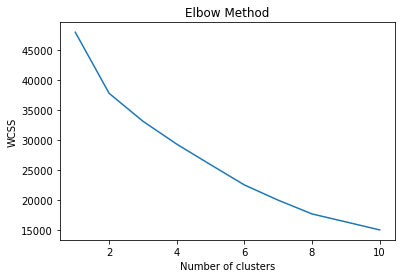

In [38]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [39]:
clusters_new=KMeans(7,random_state=42)
clusters_new.fit(scaled_data_df)

KMeans(n_clusters=7, random_state=42)

In [40]:
clusters_new.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [41]:
data["clusterid_new"]=clusters_new.labels_
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [42]:
clusters_new.cluster_centers_

array([[-3.69600882e-01, -1.42585178e-01, -7.25288784e-01,
        -9.82418871e-02, -5.97918287e-02, -6.01247447e-01,
        -6.51165468e-01, -2.00351030e-01, -2.26967064e-01,
        -2.96735444e-01, -7.66919299e-01,  7.50737966e-01],
       [ 8.87549149e-02, -7.13787993e-02,  4.40819325e-01,
        -9.82418871e-02, -5.88472826e-02,  3.95246809e-01,
         2.65111889e-01, -3.97415634e-02, -3.43523568e-02,
         2.23772183e-01,  1.30391816e+00, -1.29575224e+00],
       [ 4.11291271e-01,  7.12107127e+00, -5.66795414e-02,
        -9.82418871e-02, -6.27665798e-02,  9.59770575e-03,
         5.68853366e-02,  3.07135229e-01,  3.31172214e-01,
        -8.06182897e-02,  3.06848272e-01, -3.10405102e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01, -3.40723475e-01],
       [ 3.96490482e-01, -1.53278699e-01,  8.6824931

In [43]:
data.groupby("clusterid_new").mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid
clusterid_new,,,,,,,,,,,,
0,36359.210221,33.815331,1.060976,1.000000,1.000581,2625.954123,5.349013,179.557491,0.512776,3505.837398,0.000000,1.000000
1,82544.544759,88.898240,2.666412,1.000000,1.000765,26689.245601,14.147666,404.416220,1.243305,4580.621270,1.000000,0.000000
2,115044.296296,5652.740741,1.981481,1.000000,1.000000,17376.611111,12.148148,890.055556,2.629630,3952.092593,0.518519,0.481481
3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,0.466667
4,113552.923398,25.543175,3.254875,1.000000,1.001393,27388.232591,17.533426,195.033426,0.575209,4603.142061,0.000000,1.000000
5,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,0.604651
6,221853.028571,543.742857,2.707143,1.000000,1.000000,46527.385714,30.528571,5580.307143,16.507143,4913.242857,0.864286,0.235714


In [44]:
data[data["clusterid_new"]==0]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,14776,0,1,1,1,500,1,0,0,6952,0,1,0
5,16420,0,1,1,1,0,0,0,0,6942,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,11310,0,1,1,1,5021,2,0,0,1409,0,1,0
3992,11181,0,1,1,1,929,12,0,0,1407,0,1,0
3993,3974,0,1,1,1,365,3,0,0,1397,0,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1,0


In [45]:
data[data["clusterid_new"]==1]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,clusterid_new
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1
7,20856,0,1,1,1,5250,4,250,1,6938,1,0,1
9,104860,0,3,1,1,28426,28,1150,3,6931,1,0,1
11,96522,0,5,1,1,61105,19,0,0,6924,1,0,1
15,28495,0,4,1,1,49442,15,0,0,6912,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,11933,0,1,1,1,249,3,79,1,1412,1,0,1
3989,2622,0,1,1,1,1625,6,0,0,1404,1,0,1
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,0,1


In [46]:
data[data["clusterid_new"]==2]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,clusterid_new
70,84409,5031,2,1,1,15436,16,1150,4,7766,0,1,2
335,278457,6727,4,1,1,57313,27,1000,2,7101,1,0,2
420,529886,7210,1,1,1,23866,26,7741,15,8296,1,0,2
532,86520,3445,5,1,1,64450,20,1000,2,6592,1,0,2
589,133445,8264,1,1,1,3375,13,0,0,6492,1,0,2
676,26556,3490,1,1,1,2845,14,720,4,6339,1,0,2
681,119082,5051,1,1,1,4230,17,3600,14,6340,1,0,2
743,440265,4081,1,1,1,22750,15,1250,10,6234,1,0,2
800,74924,6286,4,1,1,59650,13,0,0,6141,0,1,2
833,114932,8559,1,1,1,3150,13,1650,12,6092,1,0,2


In [47]:
data[data["clusterid_new"]==3]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,clusterid_new
106,96627,1182,1,1,3,49059,26,2300,9,6738,1,0,3
384,28193,0,5,1,4,103456,32,0,0,6980,1,0,3
850,25629,0,4,1,5,107308,36,600,2,5966,1,0,3
904,15835,0,2,1,5,112171,16,0,0,5825,1,0,3
1036,154664,0,4,1,3,73881,33,0,0,5769,0,1,3
1244,166465,0,4,1,4,98717,30,0,0,5531,0,1,3
1300,737514,0,3,1,4,43993,40,2150,7,5030,0,1,3
1878,128302,0,5,1,4,132263,32,400,2,4103,1,0,3
1917,82981,0,5,1,3,105325,44,1000,2,3964,1,0,3
1946,126873,0,4,1,5,95598,32,500,1,3880,1,0,3


In [48]:
data[data["clusterid_new"]==4]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,clusterid_new
6,84914,0,3,1,1,27482,25,0,0,6994,0,1,4
12,43382,0,2,1,1,11150,20,0,0,6924,0,1,4
24,205651,500,1,1,1,4025,21,700,4,7932,0,1,4
30,177926,0,3,1,1,20797,13,0,0,7886,0,1,4
32,276571,0,4,1,1,42044,23,0,0,7872,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,26504,0,2,1,1,10599,29,1000,7,1445,0,1,4
3974,58387,0,3,1,1,14581,39,0,0,1435,0,1,4
3980,28867,0,3,1,1,19169,28,0,0,1425,0,1,4
3985,59017,0,4,1,1,34746,25,0,0,1418,0,1,4


In [49]:
data[data["clusterid_new"]==5]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,clusterid_new
8,443003,0,3,2,1,1753,43,3850,12,6948,1,0,5
198,8669,0,1,3,1,11397,16,0,0,7486,1,0,5
226,117329,0,1,2,1,6448,11,0,0,7416,1,0,5
381,167670,0,1,3,1,15907,13,0,0,6994,0,1,5
392,11189,0,1,2,1,9044,20,0,0,8296,1,0,5
561,380930,0,2,2,1,22485,25,213,1,6539,1,0,5
794,55610,0,1,2,1,5095,13,0,0,6151,0,1,5
940,44824,0,1,3,1,21107,19,2000,4,5916,1,0,5
1149,84856,0,1,2,1,6894,13,0,0,5547,0,1,5
1270,16103,0,1,3,1,10819,13,0,0,5427,0,1,5


In [50]:
data[data["clusterid_new"]==6]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,clusterid_new
65,53914,0,3,1,1,33767,45,5550,29,6826,1,0,6
94,185549,0,5,1,1,110859,39,2950,16,6778,1,0,6
112,124198,0,5,1,1,66330,23,4833,10,7710,0,1,6
121,205126,0,5,1,1,126630,45,2250,10,7668,1,0,6
126,602064,0,5,1,1,194753,26,2250,10,7652,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3846,97510,1678,5,1,1,71609,51,7650,26,1665,1,0,6
3855,190730,0,5,1,1,78916,28,2450,9,1648,1,0,6
3907,126490,0,1,1,1,8808,15,5183,12,1566,0,1,6
3911,55922,2273,1,1,1,8104,19,4104,16,1552,0,1,6


In [51]:
data.sort_values("clusterid_new")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,h_clusterid,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,1,0
2405,626,0,1,1,1,626,1,0,0,3393,0,1,0
2406,18272,0,1,1,1,2920,5,0,0,3405,0,1,0
2407,10756,0,1,1,1,1375,4,0,0,3104,0,1,0
2408,161281,0,1,1,1,6321,8,175,1,3399,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,57857,1099,1,1,1,62650,37,12400,29,4996,1,0,6
622,62080,2975,2,1,1,19113,32,10650,28,6434,1,0,6
1433,120152,0,1,1,1,6250,27,3750,26,4497,1,0,6
307,383030,2998,1,1,1,8001,25,3226,15,7326,1,0,6


In [52]:
data["clusterid_new"].value_counts()

0    1722
1    1307
4     718
6     140
2      54
5      43
3      15
Name: clusterid_new, dtype: int64

# DBSCAN

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [61]:
data=pd.read_excel("EastWestAirlines.xlsx",sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [62]:
data.drop(['ID#'],axis=1,inplace=True)

In [63]:
data.rename(columns = {'Award?':'Award'}, inplace = True)

In [64]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [65]:
data.shape

(3999, 11)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [67]:
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


<AxesSubplot:>

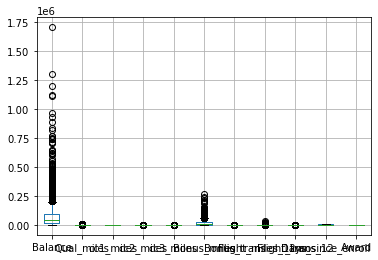

In [68]:
data.boxplot()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1235: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1236: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


<AxesSubplot:>

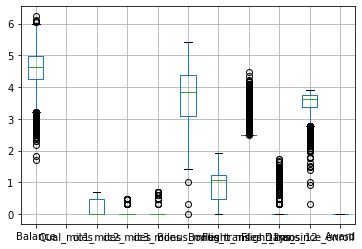

In [69]:
data.apply(np.log10).boxplot()

In [71]:
array=data.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [72]:
stscaler=StandardScaler().fit(array)
X=stscaler.transform(array)

In [73]:
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [74]:
dbscan=DBSCAN(eps=0.7,min_samples=8)
dbscan.fit(X)

DBSCAN(eps=0.7, min_samples=8)

In [76]:
dbscan.labels_

array([0, 0, 0, ..., 4, 0, 0], dtype=int64)

In [77]:
cl=pd.DataFrame(dbscan.labels_, columns=["cluster"])

In [78]:
cl

,cluster
0,0
1,0
2,0
3,0
4,-1
...,...
3994,1
3995,1
3996,4
3997,0


In [79]:
clustered=pd.concat([data,cl],axis=1)
clustered


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [80]:
clustered.mean()

Balance              73601.327582
Qual_miles             144.114529
cc1_miles                2.059515
cc2_miles                1.014504
cc3_miles                1.012253
Bonus_miles          17144.846212
Bonus_trans             11.601900
Flight_miles_12mo      460.055764
Flight_trans_12          1.373593
Days_since_enroll     4118.559390
Award                    0.370343
cluster                  1.105776
dtype: float64

In [81]:
clustered.sort_values("cluster")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,cluster
1999,327126,1452,5,1,1,97997,25,350,3,4440,1,-1
3021,20537,0,3,1,1,44791,21,2612,4,1569,1,-1
3023,24563,0,1,1,1,5718,8,4218,5,1776,0,-1
3027,129919,719,1,1,1,7150,5,650,2,3053,1,-1
3031,36459,0,1,1,1,7573,17,5473,15,2885,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3359,20318,0,1,2,1,6990,13,0,0,1956,0,12
2421,41062,0,1,2,1,8275,11,0,0,3356,0,12
2741,42970,0,1,2,1,7889,14,0,0,2256,0,12
2317,10458,0,1,2,1,10458,12,0,0,3726,0,12
